## e003 EDA
 * use correlation

In [46]:
import pandas as pd
import numpy as np
import gc
import pyarrow.parquet as pq
from multiprocessing import Pool

import scipy
from scipy import signal
from scipy.signal import butter

from matplotlib import pyplot as plt
import seaborn as sns

import sys
sys.path.append('../../guchio_utils/')

In [2]:
#plt.rcParams['font.family'] = 'IPAPGothic' #全体のフォントを設定
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%config InlineBackend.figure_formats = {'png', 'retina'}
%load_ext autoreload
%autoreload 1

In [44]:
#trn_df = pd.read_parquet('../inputs/origin/train.parquet.zip', compression='zip')
# trn_df = pq.read_pandas('../inputs/origin/train.parquet').to_pandas()
trn_meta_df = pd.read_csv('../inputs/origin/metadata_train.csv')

In [5]:
trn_df

,0,1,2,3,4,5,6,7,8,9,...,8702,8703,8704,8705,8706,8707,8708,8709,8710,8711
0,18,1,-19,-16,-5,19,-15,15,-1,-16,...,18,-22,12,8,13,6,-21,-15,-9,20
1,18,0,-19,-17,-6,19,-17,16,0,-15,...,17,-21,12,8,14,7,-19,-15,-8,21
2,17,-1,-20,-17,-6,19,-17,15,-3,-15,...,16,-21,13,8,15,8,-18,-14,-8,22
3,18,1,-19,-16,-5,20,-16,16,0,-15,...,16,-21,12,8,15,8,-19,-14,-7,23
4,18,0,-19,-16,-5,20,-17,16,-2,-14,...,17,-22,12,8,15,8,-18,-14,-8,23
5,18,0,-20,-15,-4,20,-16,15,-2,-12,...,17,-22,12,8,15,8,-19,-14,-8,22
6,19,1,-18,-16,-5,20,-16,16,-1,-13,...,18,-22,12,8,15,8,-19,-14,-8,22
7,18,0,-19,-17,-7,18,-17,15,-2,-15,...,17,-22,11,7,13,6,-20,-14,-8,22
8,18,0,-20,-18,-7,18,-16,15,-2,-16,...,17,-23,11,8,13,6,-21,-14,-8,22
9,17,0,-19,-17,-7,18,-17,17,-1,-14,...,16,-22,11,7,13,6,-21,-14,-8,22


In [6]:
trn_meta_df

,signal_id,id_measurement,phase,target
0,0,0,0,0
1,1,0,1,0
2,2,0,2,0
3,3,1,0,1
4,4,1,1,1
5,5,1,2,1
6,6,2,0,0
7,7,2,1,0
8,8,2,2,0
9,9,3,0,0


In [7]:
trn_df.info(), trn_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Columns: 8712 entries, 0 to 8711
dtypes: int8(8712)
memory usage: 6.5 GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8712 entries, 0 to 8711
Data columns (total 4 columns):
signal_id         8712 non-null int64
id_measurement    8712 non-null int64
phase             8712 non-null int64
target            8712 non-null int64
dtypes: int64(4)
memory usage: 272.3 KB


(None, None)

## basic EDA 

### やりたいこと
 * noise 除去
     * HPF
     * LPH
 * FFT 周りでなにか

In [2]:
# 描画用関数定義
from itertools import chain

def _plt_3phase_current(df, meta_df, id_measurement, ax, ylim, fontsize):
    # get info from meta_df
    target_df = meta_df.query(f'id_measurement == {id_measurement}')
    signal_ids = target_df.signal_id.astype(str)
    phase = target_df.phase.tolist()
    targets = target_df.target.tolist()
    plt_df = df.loc[:, signal_ids]
    
    # plot
    for i in range(3):
        ax.plot(plt_df.iloc[:, i], label=f'phase {phase[i]}')
        
    # decoration
    ax.set_title(f'id_measurement: {id_measurement}, targets: {targets}', fontsize=fontsize)
    ax.set_xlabel('time', fontsize=fontsize)
    ax.set_ylabel('signal', fontsize=fontsize)
    ax.legend()
    ax.set_ylim(ylim)
    
    
def plt_3phase_currents(df, meta_df, id_measurements, title=None, height_base=3, width_base=8, col_num=4, ylim=None):
    fontsize = int(height_base * width_base / 2)
    if hasattr(id_measurements, "__iter__"):
        height, width = len(id_measurements)//col_num, col_num
        if len(id_measurements) % col_num != 0:
            height += 1
        fig, axs = plt.subplots(height, width, figsize=(width*width_base, height*height_base, ))
        axs = list(chain.from_iterable(axs))
    else:
        id_measurements = [id_measurements]
        fig = plt.figure(figsize=(width_base, height_base))
        ax = fig.add_subplot(111)
        axs = [ax]
        
    for i, id_measurement in enumerate(id_measurements):
        ax = axs[i]
        _plt_3phase_current(df, meta_df, id_measurement, ax, ylim, fontsize)
        
    # decoration
    if title:
        if len(id_measurements) == 1:
            fig.suptitle(title, fontsize=fontsize, va='bottom')
        else:
            fig.suptitle(title, fontsize=fontsize*1.5, va='bottom')
    # apply tight_layout
    fig.tight_layout(rect=[0, 0.08, 1, 0.99])

### HPF, Denoising の可視化

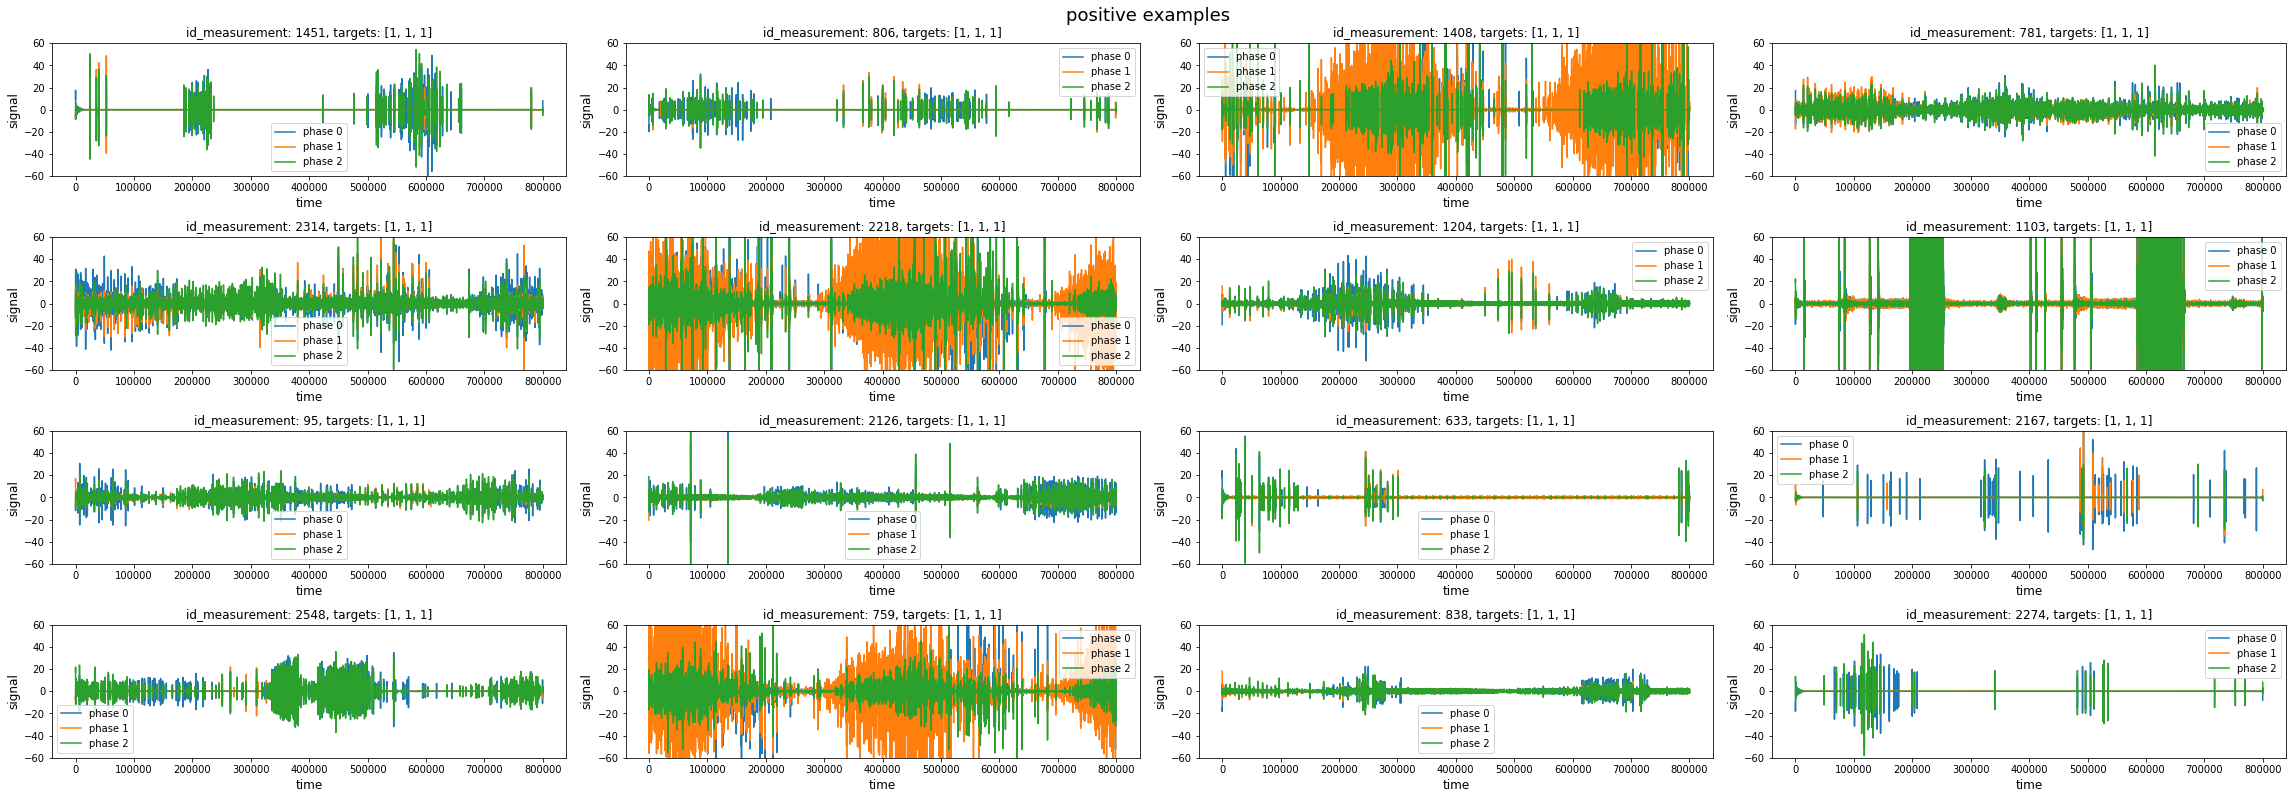

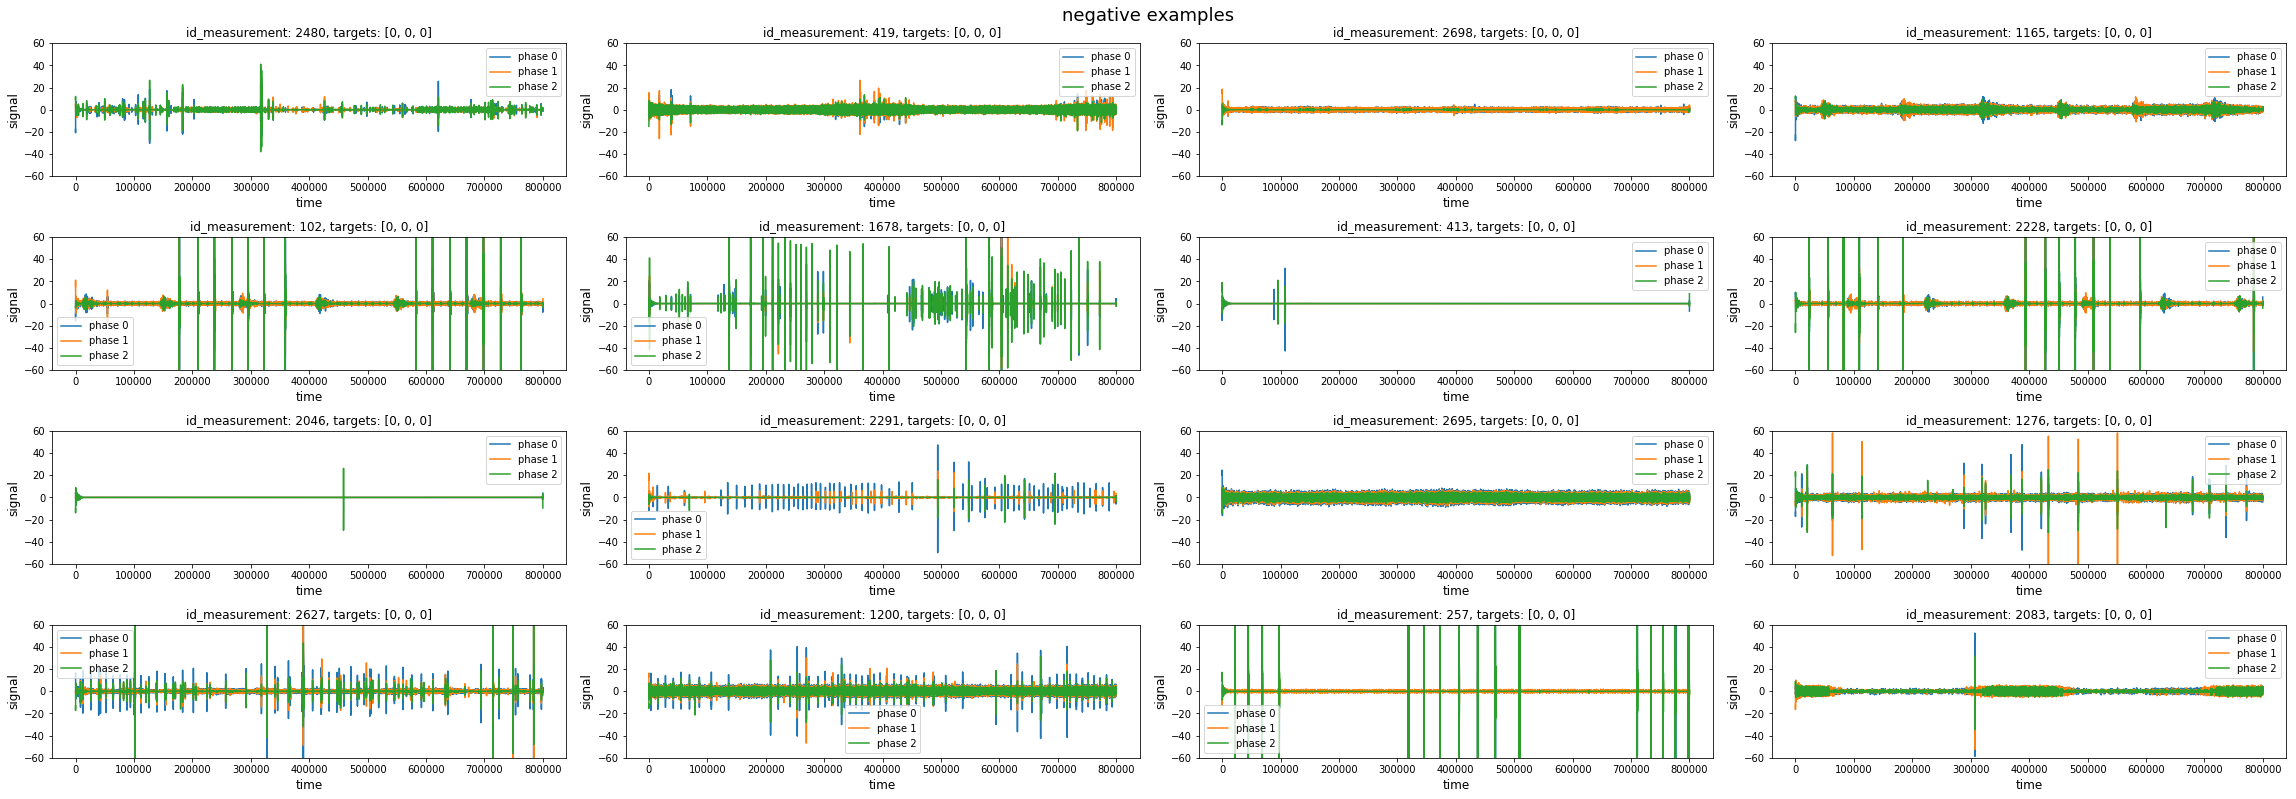

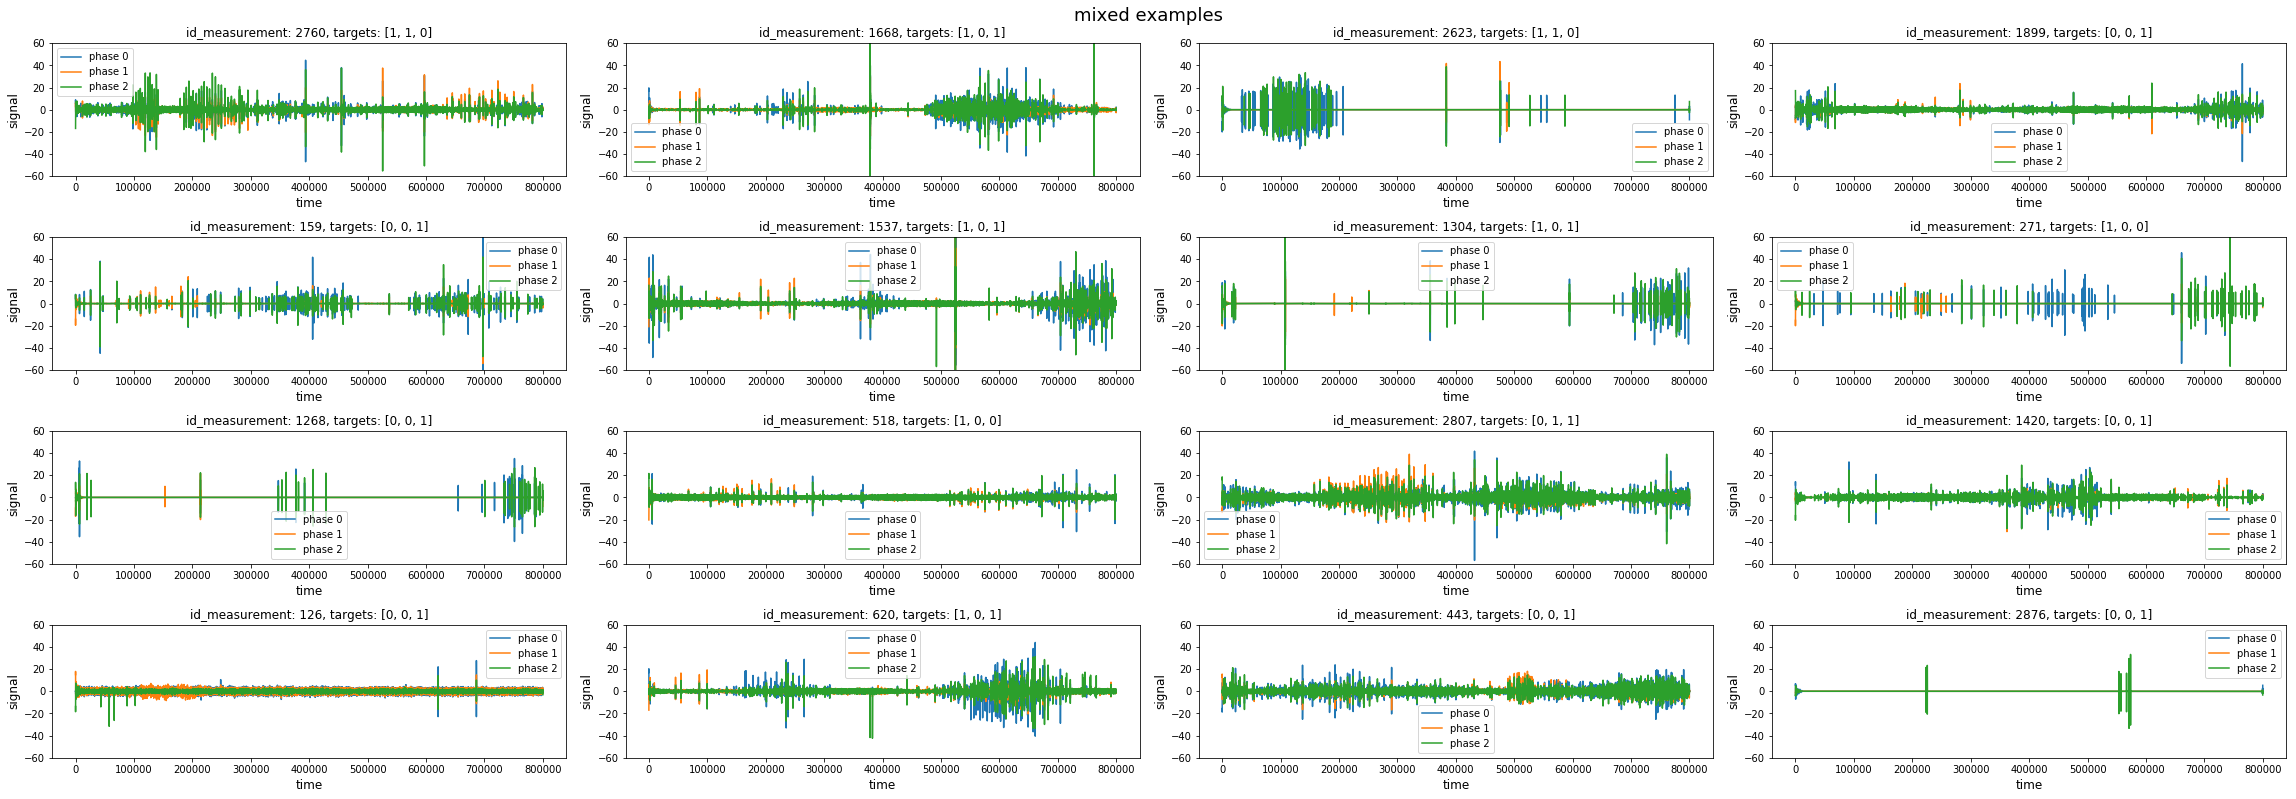

In [9]:
# 種類別にプロットしてみる
positive_example_ids = trn_meta_df.groupby('id_measurement').sum().query('target == 3').sample(16, random_state=71).index
negative_example_ids = trn_meta_df.groupby('id_measurement').sum().query('target == 0').sample(16, random_state=71).index
mixed_example_ids = trn_meta_df.groupby('id_measurement').sum().query('target != 0 & target != 3').sample(16, random_state=71).index

plt_3phase_currents(trn_hp_dn_df, trn_meta_df, positive_example_ids, title='positive examples', ylim=(-60, 60))
plt.show()

plt_3phase_currents(trn_hp_dn_df, trn_meta_df, negative_example_ids, title='negative examples', ylim=(-60, 60))
plt.show()

plt_3phase_currents(trn_hp_dn_df, trn_meta_df, mixed_example_ids, title='mixed examples', ylim=(-60, 60))
plt.show()

### 3phase の相関分析

In [35]:
from tqdm import tqdm_notebook as tqdm
def split_df(base_df, target_df, split_name, target_name, nthread):
    '''
    policy
    ------------
    * split df based on split_id, and set split_id as index
        because of efficiency.
    '''
    split_ids = base_df[split_name].unique()
    splitted_ids = np.array_split(split_ids, nthread)
    base_df = base_df.set_index(split_name)
    target_ids = []
    for splitted_id in tqdm(splitted_ids):
        target_ids.append(base_df.loc[splitted_id][target_name])
    # Pay attention that this is col-wise splitting bacause of the
    #   data structure of this competition.
    dfs = [target_df[target_id.astype(str)] for target_id in target_ids]
    return dfs

In [7]:
trn_hp_dn_df = pd.read_pickle('../inputs/prep/train_hp_dn.pkl.gz', compression='gzip')
trn_hp_dn_df

,0,1,2,3,4,5,6,7,8,9,...,8702,8703,8704,8705,8706,8707,8708,8709,8710,8711
0,13.601562,0.000906,-14.601562,-14.359375,-4.300781,17.921875,-8.484375,6.421875,-0.000802,-13.218750,...,15.773438,-17.171875,10.335938,6.441406,11.609375,3.173828,-20.593750,-13.429688,-6.679688,17.515625
1,16.234375,0.000906,-17.515625,-17.390625,-5.820312,21.062500,-9.898438,9.070312,-0.000802,-15.539062,...,18.187500,-21.968750,12.976562,7.500000,14.734375,4.218750,-18.437500,-16.000000,-7.945312,22.015625
2,11.335938,0.000906,-12.445312,-14.546875,-4.878906,18.562500,-11.429688,12.156250,-0.000802,-12.531250,...,14.906250,-17.859375,11.609375,5.574219,13.398438,5.417969,-17.937500,-13.179688,-5.648438,20.375000
3,12.453125,0.000906,-13.718750,-14.234375,-4.585938,18.843750,-12.609375,14.265625,-0.000802,-11.726562,...,14.937500,-18.078125,11.570312,6.031250,13.648438,6.257812,-16.890625,-13.085938,-6.136719,21.187500
4,17.343750,0.000906,-18.937500,-13.914062,-3.957031,19.437500,-13.406250,15.304688,-0.000802,-11.187500,...,15.960938,-19.500000,11.343750,7.976562,13.796875,6.699219,-17.671875,-13.539062,-8.343750,21.234375
5,18.375000,0.000906,-20.031250,-14.054688,-4.296875,18.796875,-14.039062,15.921875,-0.000802,-11.875000,...,15.968750,-19.625000,10.929688,8.375000,13.406250,6.980469,-17.765625,-13.343750,-8.679688,20.781250
6,17.296875,0.000906,-18.843750,-15.898438,-6.062500,18.078125,-14.375000,15.710938,-0.000802,-14.914062,...,16.234375,-20.171875,10.992188,7.929688,13.187500,6.953125,-18.812500,-13.617188,-7.976562,20.828125
7,17.312500,0.000906,-18.828125,-15.992188,-6.296875,17.390625,-14.664062,15.617188,-0.000802,-15.335938,...,16.062500,-20.062500,10.585938,7.933594,12.656250,6.960938,-18.796875,-13.234375,-7.761719,20.359375
8,17.531250,0.000906,-19.031250,-14.703125,-5.269531,16.843750,-14.914062,15.679688,-0.000802,-13.445312,...,15.421875,-19.343750,9.929688,8.023438,11.960938,7.007812,-17.828125,-12.265625,-7.601562,19.765625
9,16.953125,0.000906,-18.343750,-14.640625,-4.890625,17.015625,-14.882812,15.101562,-0.000803,-12.648438,...,15.398438,-19.484375,9.906250,7.785156,11.765625,6.816406,-17.953125,-11.960938,-7.007812,20.125000


In [36]:
trn_hp_dn_dfs = split_df(trn_meta_df, trn_hp_dn_df, 'id_measurement', 'signal_id', trn_meta_df.shape[0]//3)
trn_hp_dn_dfs[20]

,60,61,62
0,-1.866211,-13.320312,15.304688
1,-2.111328,-15.945312,18.125000
2,-2.371094,-11.398438,12.609375
3,-2.582031,-12.554688,13.773438
4,-2.742188,-17.265625,19.125000
5,-2.876953,-18.281250,20.234375
6,-2.966797,-17.250000,19.046875
7,-3.052734,-17.265625,19.062500
8,-3.134766,-17.484375,19.281250
9,-3.177734,-16.921875,18.640625


In [39]:
# 相関を求めてみる
trn_hp_dn_dfs[20].corr()

,60,61,62
60,1.000000,0.622702,-0.151298
61,0.622702,1.000000,-0.333664
62,-0.151298,-0.333664,1.000000


In [41]:
np.max(trn_hp_dn_dfs[20], axis=0)

60    43.75000
61    72.43750
62    35.15625
dtype: float16

(0    8187
 1     525
 Name: target, dtype: int64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff89a857400>)

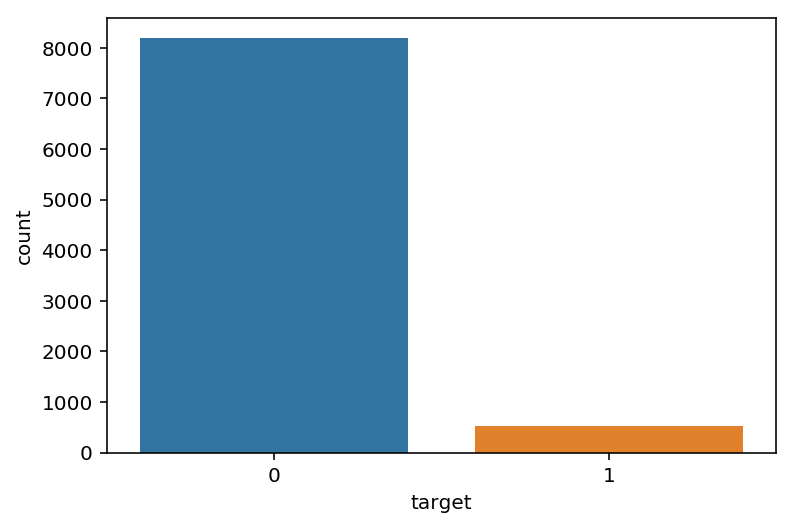

In [50]:
trn_meta_df.target.value_counts() , sns.countplot(trn_meta_df.target)